# MICROSOFT MOVIE STUDIOS PROJECT

**Presented by:** Samuel Mbugua Igecha
***

### AIM OF THIS PROJECT

This project explores data on the movies that have been produced over the years to come up with insights and recommendations for the head of Microsoft's new studio that can be used to decide what type movies to create. The data has been collected from various movie websites such as [IMDB]('https://m.imdb.com/'), [RottenTomatoes]('https://www.rottentomatoes.com/'), [Box Office Mojo]('https://www.boxofficemojo.com/'), [The Movie Database]('https://www.themoviedb.org/') and [The Numbers]('https://www.the-numbers.com/') all provided by Moringa School.

### BUSINESS PROBLEM

As a newbie into the movie industry, Microsoft is going to face alot of high competition from already established firms with far more experience like Disney, Comcast, Sony, Netflix and many others. And to add on this, it's tech competitor Amazon opened Amazon studios in 2010 and the Amazon streaming service(PRIME) to produce its own content and acquired [MGM studios]('https://comicbook.com/movies/news/amazon-closes-mgm-deal-astronomical-amount/') in 2022 along with its entire movie catalogue. Inorder for Microsoft to compete, millions upon billions in capital will have to be invested inorder to even stand a chance of being competitive. Amazon alone spent $8 billion on original in just 2022 alone.



In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3
import zipfile

In [2]:
# Extract imdb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to imdb Database
conn = sqlite3.connect('./zippedData/im.db')

In [3]:
#Import file data for analysis

tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz') #The Movie Database
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') #The Numbers
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz') #Box Office Mojo
movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz') #RottenTomatoes Movie info
reviews = pd.read_table('zippedData/rt.reviews.tsv') #Rotten Tomatoes Reviews
imdb = pd.read_sql("""SELECT *FROM sqlite_master""",conn) #imdb database

### Data Understanding
As i stated above, the data has been collected fro various sites across the web. The IMDB datasets were the most used in the analysis. They gave insights into consumer behavior with regards to ratings and movie runtimes. The next dataset was from TheNumbers that provided financial data with regards to the Box Office earnings and movie budgets, it gave insights on the correlation between the two.

In [4]:
#As we can see, there are 8 tables in the imdb database. movie_basics & movie_ratings will be most relevant as i'll extract them for my fisrt analysis
imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
#exploring the movie_basics dataset from the imdb database. i'll use this in for my fisrt analysis.
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""",conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#exploring the movie_ratings database from the imdb database. i'll use this for my first analysis.
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""",conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
#Exploring TheNumbers dataset. i'll use this for my second analysis
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [8]:
#Exploring the Rotten Tomatoes movie info data 
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [9]:
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [10]:
#Exploring the dataset from the The Movie Database
tmdb.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
movie_gross #BoxOfficeMojo

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

## FIRST ANALYSIS : How does movie runtime affect the average ratings among audiences?

Now for this analysis, the IMDB database was used. The two tables, movie_ratings and movie_basics were combined to find the average ratings per runtime.

### Data Preparation

In [13]:
#i will join the movie_basics & movie_ratings table from the IMDB database inorder to extract average rating and runtime.

movie_basics = pd.read_sql("""SELECT* 
FROM movie_ratings 
LEFT JOIN movie_basics 
USING(movie_id);
""",conn)       
movie_basics.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [14]:
#checking for duplicated data
movie_basics.duplicated().sum()

0

In [15]:
#checking for any missing data
movie_basics.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [16]:
#Replace null values in runtime column with the median value
movie_basics = movie_basics.fillna(movie_basics['runtime_minutes'].median())
movie_basics

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,91.0,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [17]:
#making sure there's no null values left after replacing them
movie_basics.isna().sum()

movie_id           0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

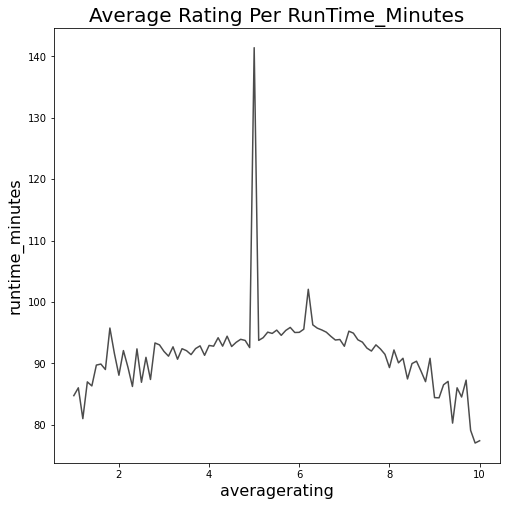

In [18]:
run_time = movie_basics.groupby('averagerating').runtime_minutes.mean()
# Plotting a line chart showing the average rating per runtime
plt.subplots(figsize = (8,8))
plt.plot(run_time, color='k', alpha=.7)

# Defining the plot title, labels and fontsize of both axis
plt.title('Average Rating Per RunTime_Minutes', fontsize = 20)
plt.xlabel('averagerating', fontsize =16)
plt.ylabel('runtime_minutes', fontsize = 16);

### Analysis and recommendations

A movie’s runtime has the potential to impact budget, profits and even word of mouth. With millions of dollars on the line, those precious minutes are never arbitrary. In an age when there’s no shortage of entertainment options, you don’t need audiences to exit the movie theater and think, “It was good, but it was very long.”

From the line chart above, it is observed that movies with with large runtimes are unpopular among movie going audiences. Therefore it's recommended that movies produced should have an average runtime of 90 minutes as they are less expensive to put together and therefore less of a financial risk considering audience ratings play a role on people deciding on whether to go watch a film or not as one simply has to look at the imdb ratings listed on a specific movie. 

Another recommendation is carrying out test screenings before releasing a movie to see how a few select audience will react and if there's negative reaction towards the runtime then some scenes from the movie can then be cut without affecting the overall quality of the movie. Average runtime sometimes translates to rewatchability hence audiences will more than likely pick up the physical medium or stream a movie with the cut scenes at the end of its theatre run. Netflix for example has a 90 minute category on its streaming service.

## SECOND ANALYSIS: Do high budget blockbuster movies generate large revenue margins?

TheNumbers dataset was cleaned

### Data Preparation

In [19]:
movie_budgets.head() #thenumbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
#Checking for null values in dataset
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
#checking for duplicated data
movie_budgets.duplicated().sum()

0

In [22]:
#remove symbols from the worldwide_gross column before converting to float
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')

In [23]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0.000000e+00
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482",2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,0.000000e+00


In [24]:
#Remove symbols from budget column before converting to float
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')

In [25]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(float)
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,"$48,482",2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,0.000000e+00


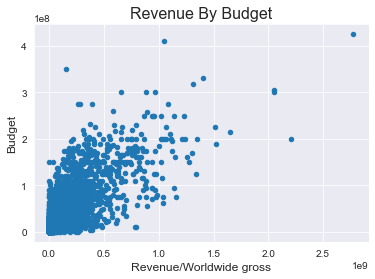

In [26]:
#Plotting a scatterplot to see if there's any correlation between the budget and worldwide gross/revenue
sns.set_style('darkgrid')
movie_budgets.plot.scatter(x= 'worldwide_gross', y ='production_budget')
plt.title('Revenue By Budget', fontsize=16)
plt.xlabel('Revenue/Worldwide gross', fontsize=12)
plt.ylabel('Budget', fontsize=12);

### Analysis and recommendations

For the above scatter plot it shows a positive correlation between budget and revenue/worldwide gross however as the saying goes, the correlation doesn't equal causation. In simple terms, this means that what is being observed is that two figures are correlated and no clarity on what is causing it and why. According to the above analysis it indicates the following;

- **Budgets lead Box office.** Because the audiences want to see big films therefore pay more or go more often to watch them.

- **Box office leads budget.** Because the industry makes films in response to market demand, thereby avoiding films too costly for their likely revenue returns.

- **Other factors are leading both budget and box office.** Such as the level of confidence the industry has in a movie project, which raises both the budget and the marketing spend before it reaches theaters.

My recommendation to Microsoft movie studios is that since they are knew entrants into the movie industry, they should start off with low budget and indie films to gauge the market as it takes into account its startup capital. Unless Microsoft has the budget to adapt one of their large popular gaming franchises into movies e.g. Gears of war and Halo that have a large loyal fanbase into a guaranteed money making juggernauts like Disney and WarnerBros have done with Marvel and DC then that will pose less of a financial risk.